# Floor division and modulus

The floor division operator, `÷`, divides two numbers and rounds down to an integer. For example, suppose the run time of a movie is 105 minutes. You might want to know how long that is in hours. Conventional division returns a floating-point number:

In [4]:
minutes = 105
minutes/60

1.75

But we don’t normally write hours with decimal points. Floor division returns the integer number of hours, rounding down:

In [6]:
hours = minutes ÷ 60

1

To get the remainder, you could subtract off one hour in minutes:

In [7]:
remainder = minutes - hours * 60

45

An alternative is to use the modulus function `mod` which divides two numbers and returns the remainder:

In [8]:
remainder = mod(minutes, 60)

45

The modulus operator is more useful than it seems. For example, you can check whether one number is divisible by another—if `mod(x, y)` is zero, then `x` is divisible by `y`.

Also, you can extract the right-most digit or digits from a number. For example, `mod(x, 10)` yields the right-most digit of `x` (in base 10). Similarly `mod(x, 100)` yields the last two digits.

# Boolean expressions

A *boolean expression* is an expression that is either `true` or `false`. The following examples use the operator `==`, which compares two operands and produces `true` if they are equal and `false` otherwise:

In [9]:
5 == 5

true

In [10]:
5 == 6

false

`true` and `false` are special values that belong to the type `Bool`; they are not strings:

In [11]:
typeof(true)

Bool

In [12]:
typeof(false)

Bool

The `==` operator is one of the *relational operators*; the others are:
```julia
      x ≠ y                # x is not equal to y
      x != y
      x > y                # x is greater than y
      x < y                # x is less than y
      x ≥ y                # x is greater than or equal to y
      x >= y
      x ≤ y                # x is less than or equal to y
      x <= y
```
      
A common error is to use a single equal sign (`=`) instead of a double equal sign (`==`). Remember that `=` is an assignment operator and `==` is a relational operator. There is no such thing as `=<` or `=>`.

In [17]:
5 ≥ 6

false

# Logical operators

There are three main *logical operators*: and (`&`), or (`|`), and not (`!`). The semantics (meaning) of these operators is similar to their meaning in English. For example, `x > 0 & x < 10` is true only if `x` is greater than 0 and less than 10.

`(mod(n, 2) == 0) | (mod(n, 3) == 0)` is true if either or both of the conditions is true, that is, if the number is divisible by 2 or 3.

In [5]:
n = 8
(mod(n, 2) == 0) | (mod(n, 3) == 0)

true

Finally, the not operator negates a boolean expression, so `!(x > y)` is true if `x > y` is false, that is, if `x` is less than or equal to `y`.

Strictly speaking, the logical operators in Julia are *bitwise operators*:

In [24]:
42 & true

0

In [25]:
typeof(42 & true)

Int64

This flexibility can be useful, but there are some subtleties to it that might be confusing. You might want to avoid it (unless you know what you are doing).

# Conditional execution

In order to write useful programs, we almost always need the ability to check conditions and change the behavior of the program accordingly. *Conditional statements* give us this ability. The simplest form is the `if` statement:

In [29]:
x = 1
if x ≥ 0
    println(x, " is positive")
end

1 is positive


The boolean expression after `if` is called the *condition*. If it is true, the statements before `end` run. If not, nothing happens.

`if` statements have the same structure as function definitions: a header followed by a body terminated with `end`. Statements like this are called *compound statements*.

There is no limit on the number of statements that can appear in the body. Occasionally, it is useful to have a body with no statements (usually as a place keeper for code you haven’t written yet).

In [30]:
if x < 0
    # TODO: need to handle negative values!
end

# Alternative execution

A second form of the `if` statement is *alternative execution*, in which there are two possibilities and the condition determines which one runs. The syntax looks like this:

In [35]:
x = 4
if mod(x, 2) == 0
    println(x, " is even")
else
    println(x, " is odd")
end

4 is even


If the remainder when `x` is divided by 2 is 0, then we know that `x` is even, and the program displays an appropriate message. If the condition is false, the second set of statements runs. Since the condition must be `true` or `false`, exactly one of the alternatives will run. The alternatives are called *branches*, because they are branches in the flow of execution.

# Chained conditionals

Sometimes there are more than two possibilities and we need more than two branches. One way to express a computation like that is a *chained conditional*:

In [34]:
x = 1
y = 2
if x < y
    println(x, " is less than ", y)
elseif x > y
    println(x, " is greater than ", y)
else
    println(x, " and ", y, " are equal")
end

1 is less than 2


Again, exactly one branch will run. There is no limit on the number of `elseif` statements. If there is an `else` clause, it has to be at the end, but there doesn’t have to be one.

Each condition is checked in order. If the first is false, the next is checked, and so on. If one of them is true, the corresponding branch runs and the statement ends. Even if more than one condition is true, only the first true branch runs.

Python:
```python
if x < y:
    print(x, 'is less than', y)
elif x > y:
    print(x, 'is greater than', y)
else:
    print(x, 'and', y, 'are equal')
```

`if` statements have the same structure as function definitions: a header followed by an indented body.

There is no limit on the number of statements that can appear in the body, but there has to be at least one. Occasionally, it is useful to have a body with no statements (usually as a place keeper for code you haven’t written yet). In that case, you can use the `pass` statement, which does nothing.

```python
if x < 0:
    pass          # TODO: need to handle negative values
```

C++:
```C++
if (x < y) {
    std::cout << x << " is less than " << y << std::endl;
} else if (x > y) {
    std::cout << x << " is greater than " << y << std::endl;
} else {
    std::cout << x << " and " << y << " are equal" << std::endl;
}
```
`if` statements have the same structure as function definitions: a header followed by a body started with `{` and ended with `}`. The condition is surrounded by parentheses.

# Nested conditionals

One conditional can also be nested within another. We could have written the example in the previous section like this:

In [39]:
x = 1
y = 2
if x == y
    println(x, " and ", y, " are equal")
else
    if x < y
        println(x, " is less than ", y)
    else
        println(x, " is greater than ", y)
    end
end

1 is less than 2


The outer conditional contains two branches. The first branch contains a simple statement. The second branch contains another if statement, which has two branches of its own. Those two branches are both simple statements, although they could have been conditional statements as well.

Although the indentation of the statements makes the structure apparent, *nested conditionals* become difficult to read very quickly. It is a good idea to avoid them when you can.

Logical operators often provide a way to simplify nested conditional statements. For example, we can rewrite the following code using a single conditional:

In [42]:
x = 1
if 0 < x
    if x < 10
        println(x, " is a positive single-digit number")
    end
end

The `print` statement runs only if we make it past both conditionals, so we can get the same effect with the `&` operator:

In [50]:
x = 1
if 0 < x & x < 10
    println(x, " is a positive single-digit number")
end

1 is a positive single-digit number


# Short-circuit Evaluation

*Short-circuit evaluation* is quite similar to conditional evaluation. The behaviour is found in most imperative programming languages having the `&&` and `||` boolean operators: in a series of boolean expressions connected by these operators, only the minimum number of expressions are evaluated as are necessary to determine the final boolean value of the entire chain:

In [51]:
x = 1
if 0 < x && x < 10
    println(x, " is a positive single-digit number")
end

1 is a positive single-digit number


If `x` is less than 0 only the first conditional `0 < x` is evaluated.

Both `&&` and `||` associate to the right, but `&&` has higher precedence than `||` does.

# Recursion

It is legal for one function to call another; it is also legal for a function to call itself. It may not be obvious why that is a good thing, but it turns out to be one of the most magical things a program can do. For example, look at the following function:

In [56]:
function countdown(n)
    if n <= 0
        println("Blastoff!")
    else
        print(n, " ")
        countdown(n-1)
    end
end
countdown(3)

3 2 1 Blastoff!


If `n` is 0 or negative, it outputs the word, “Blastoff!” Otherwise, it outputs `n` and then calls a function named countdown —itself— passing `n-1` as an argument.

What happens if we call this function like `countdown(3)`?

The execution of `countdown` begins with `n=3`, and since `n` is greater than 0, it outputs the value 3, and then calls itself...

* The execution of `countdown` begins with `n=2`, and since `n` is greater than 0, it outputs the value 2, and then calls itself...
    
    * The execution of `countdown` begins with `n=1`, and since `n` is greater than 0, it outputs the value 1, and then calls itself...
        
        * The execution of `countdown` begins with `n=0`, and since `n` is not greater than 0, it outputs the word, `“Blastoff!”` and then returns.
            
    * The `countdown` that got `n=1` returns.
        
* The `countdown` that got `n=2` returns.
    
The `countdown` that got `n=3` returns.

And then you’re back in `__main__`.

A function that calls itself is *recursive*; the process of executing it is called *recursion*.
As another example, we can write a function that prints a string n times:

In [55]:
function print_n(s, n)
    if n <= 0
        return
    end
    println(s)
    print_n(s, n-1)
end

print_n (generic function with 1 method)

If `n <= 0` the *return* statement exits the function. The flow of execution immediately returns to the caller, and the remaining lines of the function don’t run.

The rest of the function is similar to `countdown`: it displays `s` and then calls itself to display `s` `n−1` additional times. So the number of lines of output is `1 + (n - 1)`, which adds up to `n`.

For simple examples like this, it is probably easier to use a `for` loop. But we will see examples later that are hard to write with a `for` loop and easy to write with recursion, so it is good to start early.

# Stack diagrams for recursive functions

In lecture 5, we used a stack diagram to represent the state of a program during a function call. The same kind of diagram can help interpret a recursive function.

Every time a function gets called, Julia creates a frame to contain the function’s local variables and parameters. For a recursive function, there might be more than one frame on the stack at the same time.

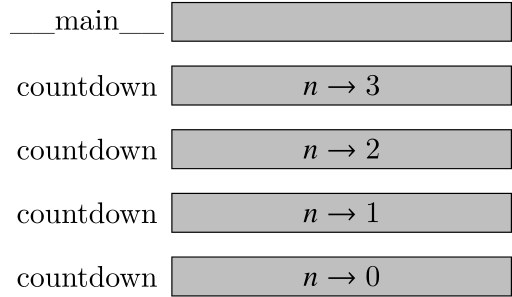

In [66]:
using TikzPictures
TikzPicture(L"""
    \node (main) [draw, fill=lightgray, minimum width=4cm] {$\phantom{3}$};
    \node [left of=main, xshift=-2cm] {\textrm{\_\_main\_\_}};
    \node (c1) [draw, fill=lightgray, below of=main, yshift=0.25cm, minimum width=4cm] {$n\rightarrow3$};
    \node [left of=c1, xshift=-2cm] {$\textrm{countdown}$};
    \node (c2) [draw, fill=lightgray, below of=c1, yshift=0.25cm, minimum width=4cm] {$n\rightarrow2$};
    \node [left of=c2, xshift=-2cm] {$\textrm{countdown}$};
    \node (c3) [draw, fill=lightgray, below of=c2, yshift=0.25cm, minimum width=4cm] {$n\rightarrow1$};
    \node [left of=c3, xshift=-2cm] {$\textrm{countdown}$};
    \node (c4) [draw, fill=lightgray, below of=c3, yshift=0.25cm, minimum width=4cm] {$n\rightarrow0$};
    \node [left of=c4, xshift=-2cm] {$\textrm{countdown}$};
"""; options="very thick, scale=3, transform shape", preamble="""
    \\usepackage{newtxmath}
    \\renewcommand{\\familydefault}{\\sfdefault}
""")

As usual, the top of the stack is the frame for `__main__`. It is empty because we did not create any variables in `__main__` or pass any arguments to it.

The four countdown frames have different values for the parameter `n`. The bottom of the stack, where `n=0`, is called the *base case*. It does not make a recursive call, so there are no more frames.

# Infinite Recursion

If a recursion never reaches a base case, it goes on making recursive calls forever, and the program never terminates. This is known as infinite recursion, and it is generally not a good idea. Here is a minimal program with an infinite recursion:

In [68]:
function recurse()
    recurse()
end

recurse (generic function with 1 method)

In most programming environments, a program with infinite recursion does not really run forever.

Julia reports a `StackOverflowError` when the maximum recursion depth is reached:

In [69]:
recurse()

LoadError: [91mStackOverflowError:[39m

When the error occurs, there are 80000 recurse frames on the stack!

If you encounter an infinite recursion by accident, review your function to confirm that there is a base case that does not make a recursive call. And if there is a base case, check whether you are guaranteed to reach it.

# Keyboard Input

The programs we have written so far accept no input from the user. They just do the same thing every time.

Julia provides a built-in function called `readline` that stops the program and waits for the user to type something. When the user presses `Return` or `Enter`, the program resumes and `readline` returns what the user typed as a string.

In [70]:
text = readline()

STDIN> Hello, World!


"Hello, World!"

In [71]:
text

"Hello, World!"

Before getting input from the user, it is a good idea to print a prompt telling the user what to type.

In [73]:
print("What is your name? ")
name = readline()

What is your name? STDIN> Ben Lauwens


"Ben Lauwens"

If you expect the user to type an integer, you can try to convert the return value to `Int`:

In [77]:
println("What is the airspeed velocity of an unladen swallow?")
speed = readline()
parse(Int, speed)

What is the airspeed velocity of an unladen swallow?
STDIN> What do you mean, an African or a European swallow?


LoadError: [91mArgumentError: invalid base 10 digit 'W' in "What do you mean, an African or a European swallow?"[39m

We will see how to handle this kind of error later.

# Debugging

When a syntax or runtime error occurs, the error message contains a lot of information, but it can be overwhelming. The most useful parts are usually:

- What kind of error it was, and
- Where it occurred.

Syntax errors are usually easy to find. You should take the time to read error messages carefully, but don’t assume that everything they say is correct.

Runtime errors in Julia throw an `Exception` and an error message hints to what is wrong.

Semantic errors are more difficult to troubleshoot. Suppose you are trying to compute a signal-to-noise ratio in decibels. The formula is 
$$
SNR_{db} = 10 \log_{10} \left(\frac{P_{signal}}{P_{noise}}\right)
$$
In Julia, you might write something like this:

In [78]:
signal_power = 9
noise_power = 10
ratio = signal_power ÷ noise_power
decibels = 10 * log10(ratio)
println(decibels)

-Inf


This result is not what we expected. To find the real error, it might be useful to print the value of `ratio`, which turns out to be 0. The problem is in line 3, which uses floor division instead of floating-point division.